In [52]:
import pandas as pd
import numpy as np

In [53]:
df=pd.read_csv("/content/ro_plant_dataset.csv")
df.head()


,Location,Plant Size (m³/day),Year of Construction,Plant Type,Financing,Water Salinity (ppm),Price
0,Australia,38220,2020,Wastewater,Public,1119,76.65
1,Brazil,27646,2013,Brackish,Private,31674,58.46
2,Saudi Arabia,39649,1998,Wastewater,Private,1361,79.51
3,Brazil,24049,1992,Wastewater,PPP,4854,48.60
4,Brazil,15069,2020,Brackish,Public,39122,34.03


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features and target
X = df.drop(columns=["Price"])
y = df["Price"]

# Identify categorical and numerical columns
categorical_columns = ["Location", "Plant Type", "Financing"]
numerical_columns = ["Plant Size (m³/day)", "Year of Construction", "Water Salinity (ppm)"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(), categorical_columns)
    ]
)

# Apply transformations and split the data
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Check the shape of processed data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 15), (100, 15), (400,), (100,))

In [55]:
pd.set_option('display.max_columns', None)


print(X_train)

[[-1.39767182  1.53375092 -0.80950433 ...  0.          0.
   1.        ]
 [ 1.73426199 -1.1629979  -0.78899481 ...  0.          1.
   0.        ]
 [ 0.47684198 -0.96323873 -0.80698008 ...  0.          1.
   0.        ]
 ...
 [ 0.11523334  0.13543672  1.03799384 ...  0.          0.
   1.        ]
 [ 1.09350553 -0.66359997 -0.8233246  ...  0.          0.
   1.        ]
 [-1.69431567  1.53375092 -0.78729094 ...  0.          1.
   0.        ]]


In [56]:
X_test

array([[-0.17882913, -0.26408162,  1.17979355, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.44113168, -1.36275707, -0.80761115, ...,  1.        ,
         0.        ,  0.        ],
       [-0.51505418, -0.36396121, -0.82162073, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.39000055,  0.73471423,  1.31553507, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.58210384,  0.73471423, -0.66391825, ...,  0.        ,
         0.        ,  1.        ],
       [-0.57098413,  1.23411216, -0.69118014, ...,  0.        ,
         0.        ,  1.        ]])

SVM


In [57]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training an SVM regressor
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2


(102.70927040027769, 7.393108140023685, 0.8721724302376819)

Plot for actual price vs predicted values for SVM

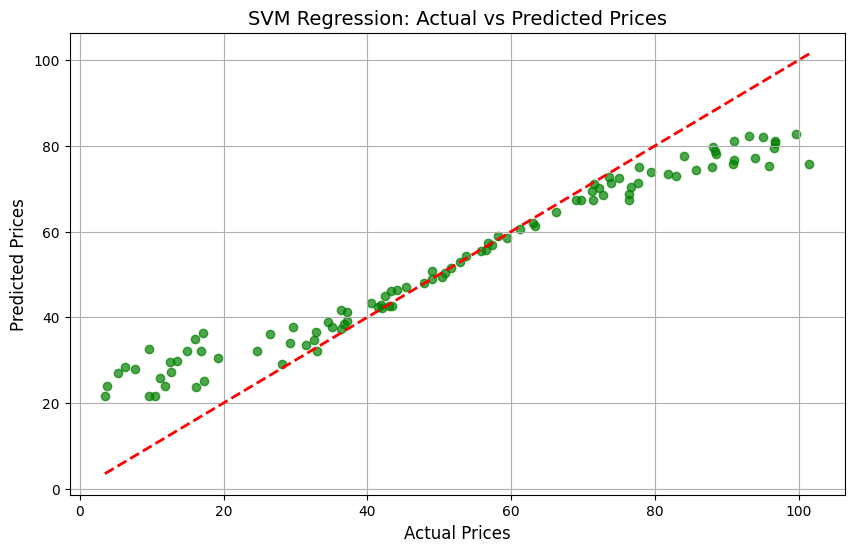

In [58]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('SVM Regression: Actual vs Predicted Prices', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(True)
plt.show()


Residual plot

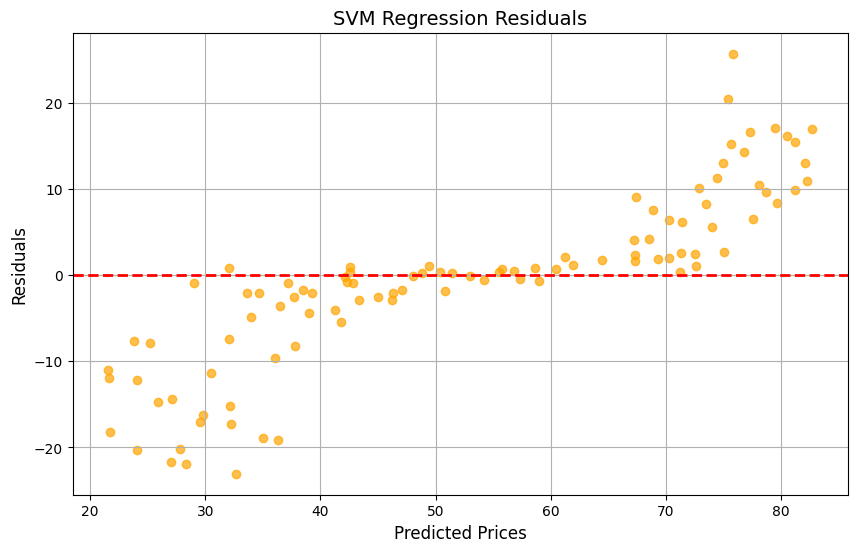

In [59]:

residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('SVM Regression Residuals', fontsize=14)
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()


Linear regression

In [60]:
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, mae_linear, r2_linear


(0.0037865689239501917, 0.05408164062499999, 0.9999952873980956)

 Plot for actual value vs predicted value

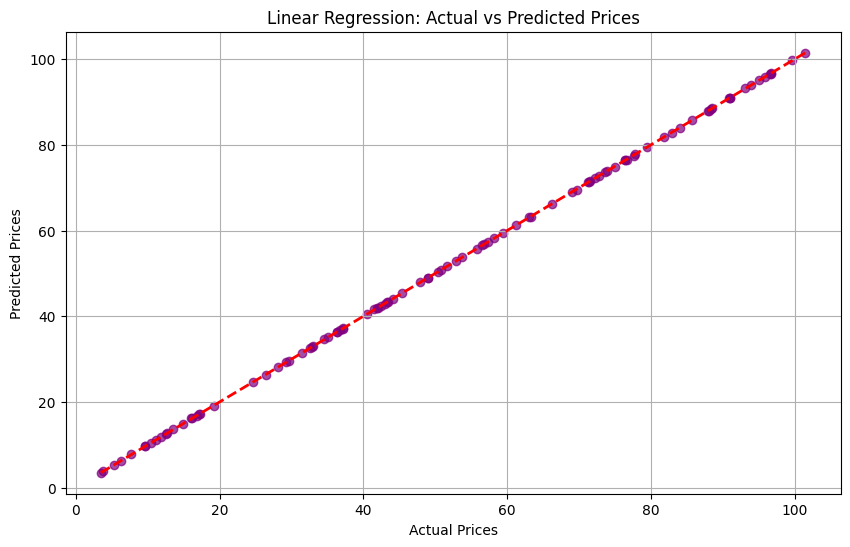

In [61]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


Plot for residuals

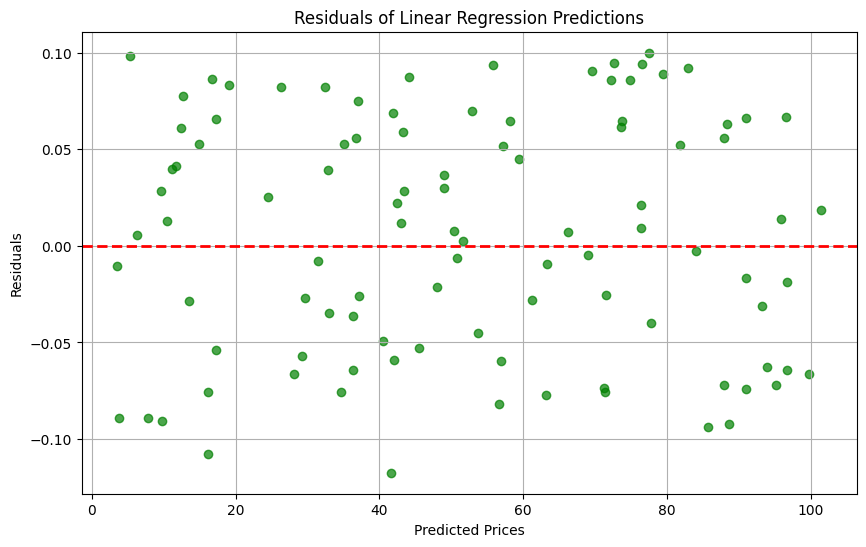

In [62]:

residuals = y_test - y_pred_linear


plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals of Linear Regression Predictions')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Decision tree


In [63]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred_decision = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_decision)
mse = mean_squared_error(y_test, y_pred_decision)
r2 = r2_score(y_test, y_pred_decision)

mae, mse, r2

(1.0162000000000007, 2.0760580000000015, 0.9974162269112478)

Decision Tree visualizations:
Plot actual vs predicted values

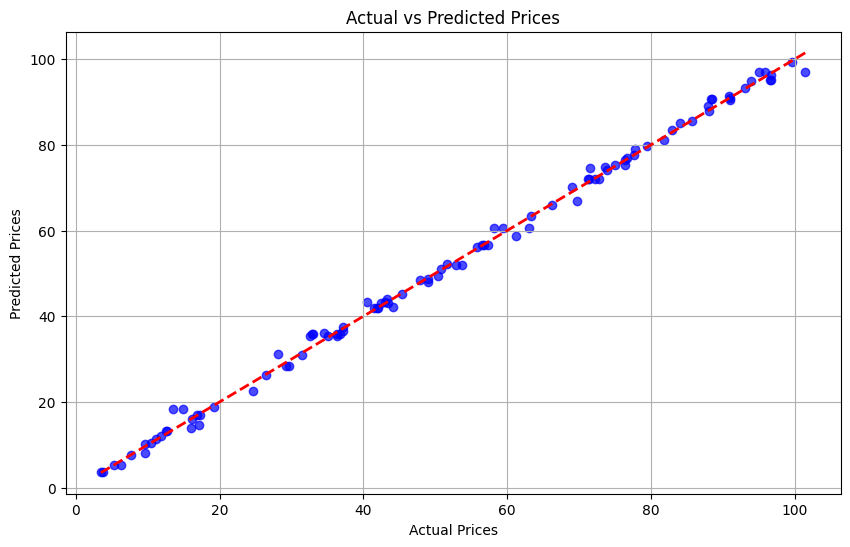

In [64]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_decision, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


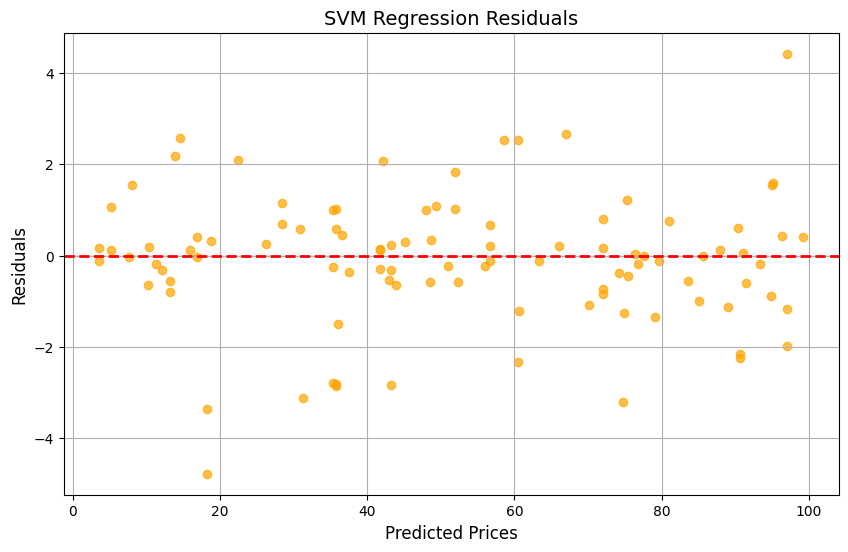

In [65]:
# Calculate residuals
residuals = y_test - y_pred_decision

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_decision, residuals, alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('SVM Regression Residuals', fontsize=14)
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()
